# Miniproyecto2 
## Luis Delgado 17187

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

# Función acumulada ponderada

$$ F(x)=\sum_{i=1}^{n}p_{i}F_{i}(x) $$

##### Algoritmo para generar V

Al V, estar definida por la funcion de distribución acumulada, e una variable aleatoria continua. Por lo tanto el método de la transformación inversa se puede utilizar para encontrar V.

El algoritmo se define de la siguiente forma:
1. Definir la función de Densidad $f_i(x)$ que representa la variable a modelar.
2. Calcular la función acumulada $f(x)$.
3. Despejar la variable aleatoria x y obtener la función acumulada inversa f(x)-1.
4. Generar las variables aleatorias x, sustituyendo valores con números pdeudoaleatorios ri ~U (0,1) en la función acumulada inversa.

In [2]:
# Definir función de densidad f(x)
# La gráfica de resultados debe verse como si se graficara esta funcion
def funcion_densidad(x):
    return 400/(x**0.75)

Grafica de funcion de densidad:


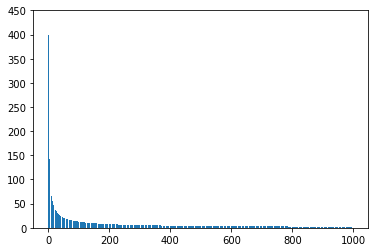

In [3]:
n = 1000
probabilities = []

for i in range(1,n - 1):
    probabilities.append(funcion_densidad( i))
print("Grafica de funcion de densidad:")
plot1 = plt.bar(np.arange(1,n-1),probabilities)
plt.ylim(top=max(funcion_densidad(n),funcion_densidad(1))+50)
plt.show()


Grafica de densidad de resultados:


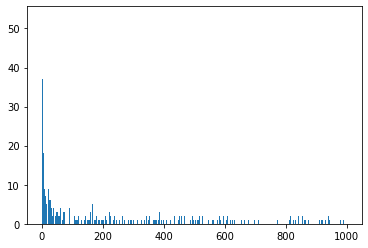

In [4]:
results = np.arange(1, n)
probabilities = np.asarray(probabilities)
acumulada = np.cumsum(probabilities/float(sum(probabilities)))
R = np.random.uniform(0, 1, n)
values=[]
for r in R:
    posicionesPosibles=acumulada[(acumulada - r) > 0]
    posicion=min(posicionesPosibles)
    values.append(int(results[np.argwhere(acumulada == posicion)]))

values = ((np.array(values) - 1) / 1).astype(int)
posibles = np.arange(1, n, 1)
frecuencias = np.bincount(values, minlength=len(posibles))
print("Grafica de densidad de resultados:")
plot1 = plt.bar(np.arange(1,n),frecuencias)
plt.show()

# Valor presente neto

In [5]:
def normal(n1,n2):
    while True:
        y1 = -math.log(random.random(), math.exp(1))
        y2 = -math.log(random.random(), math.exp(1))
        if (y2 - ((y1 - 1) ** 2) / 2) > 0:
            y1 = y2 - ((y1 - 1) ** 2) / 2
            x = random.random()
            if x <= 0.5:
                return n1 + n2 * y1
            else:
                return n1 - n2 * y1

In [6]:
def simularHotel(iteraciones, porcentaje):
    promedio=0
    for x in range(iteraciones):
        vpn = -800
        vpn += normal(-800,50) / ((1 + porcentaje) ** 1) 
        vpn += normal(-800,100) / ((1 + porcentaje) ** 2) 
        vpn += normal(-700,150) / ((1 + porcentaje) ** 3) 
        vpn += normal(300,200) / ((1 + porcentaje) ** 4) 
        vpn += normal(400,200) / ((1 + porcentaje) ** 5) 
        vpn += normal(500,200) / ((1 + porcentaje) ** 6) 
        vpn += np.random.uniform(200,8440) / ((1 + porcentaje) ** 7)
        promedio+=vpn
    return (promedio/iteraciones)

In [7]:
def simularCC(iteraciones, porcentaje):
    promedio=0
    for x in range(iteraciones):
        vpn = -900
        vpn += normal(-600,50) / ((1 + porcentaje) ** 1) 
        vpn += normal(-200,50) / ((1 + porcentaje) ** 2) 
        vpn += normal(-600,100) / ((1 + porcentaje) ** 3) 
        vpn += normal(250,150) / ((1 + porcentaje) ** 4) 
        vpn += normal(350,150) / ((1 + porcentaje) ** 5) 
        vpn += normal(400,150) / ((1 + porcentaje) ** 6) 
        vpn += np.random.uniform(1600,6000) / ((1 + porcentaje) ** 7)
        promedio+=vpn
    return (promedio/iteraciones)

In [8]:
centro_comercial_100=simularCC(100,0.1)
centro_comercial_1000=simularCC(1000,0.1)
centro_comercial_10000=simularCC(10000,0.1)
hotel_100=simularHotel(100,0.1)
hotel_1000=simularHotel(1000,0.1)
hotel_10000=simularHotel(10000,0.1)

print("VPN Centro Comercial 100 iteraciones:", centro_comercial_100)
print("VPN Centro Comercial 1000 iteraciones:", ((centro_comercial_1000)))
print("VPN Centro Comercial 10000 iteraciones:", ((centro_comercial_10000)))
print("VPN Hotel 100 iteraciones:", ((hotel_100)))
print("VPN Hotel 1000 iteraciones:", ((hotel_1000)))
print("VPN Hotel 10000 iteraciones:", ((hotel_10000)))

VPN Centro Comercial 100 iteraciones: 435.6949021569848
VPN Centro Comercial 1000 iteraciones: 482.195118055338
VPN Centro Comercial 10000 iteraciones: 504.92655890023104
VPN Hotel 100 iteraciones: 253.66423158380977
VPN Hotel 1000 iteraciones: 200.81595640474336
VPN Hotel 10000 iteraciones: 232.90012133618845


# Repartidor de periódicos

In [9]:
def simulardor_dias(n,dias):
    dinero=0
    for i in range(dias):
        # Compra periodicos del día
        dinero-=(1.5*n)
        r=random.random()
        # Se le piden 11
        if (r<0.3):
            dinero+=(2.5*n)
        # Se le piden 10
        elif(r>=0.3 and r<0.7):
            if (n==11):
                dinero+=(2.5*10)
                dinero+=0.5
            else:
                dinero+=(2.5*n)
        # Se le piden 9
        else:
            dinero+=(2.5*9)
            dinero+=(0.5*(n-9))
    return dinero
print("cant \tmes\taño\t10años")
print("9\t"+str(simulardor_dias(9,30))+"\t"+str(simulardor_dias(9,365))+"\t"+str(simulardor_dias(9,3650))+"\t")
print("10\t"+str(simulardor_dias(10,30))+"\t"+str(simulardor_dias(10,365))+"\t"+str(simulardor_dias(10,3650))+"\t")
print("11\t"+str(simulardor_dias(11,30))+"\t"+str(simulardor_dias(11,365))+"\t"+str(simulardor_dias(11,3650))+"\t")

print("\n")
diario9=(((simulardor_dias(9,30)+simulardor_dias(9,365)+simulardor_dias(9,3650))/(3650+365+30)))
diario10=(((simulardor_dias(10,30)+simulardor_dias(10,365)+simulardor_dias(10,3650))/(3650+365+30)))
diario11=(((simulardor_dias(11,30)+simulardor_dias(11,365)+simulardor_dias(11,3650))/(3650+365+30)))
print("Promedio ganancias diarias 9:\t"+str(diario9))
print("Promedio ganancias diarias 10:\t"+str(diario10))
print("Promedio ganancias diarias 11:\t"+str(diario11))

lista=[9,10,11]
comp=[diario9,diario10,diario11]

print("\n")

print("La mejor opcion es comprar: "+str(lista[comp.index(max(comp))])+" periodicos diarios")

cant 	mes	año	10años
9	270.0	3285.0	32850.0	
10	272.0	3420.0	34322.0	
11	258.0	3211.0	32754.0	


Promedio ganancias diarias 9:	9.0
Promedio ganancias diarias 10:	9.385414091470953
Promedio ganancias diarias 11:	8.933250927070457


La mejor opcion es comprar: 10 periodicos diarios
